# Limpieza de Datos (Data Cleaning)

La fase de limpieza de datos es como la "puesta a punto" de los datos antes de que realmente los utilicemos en nuestro análisis. Imagina que estamos preparando una receta: antes de empezar a cocinar, necesitamos lavar, pelar y cortar los ingredientes para asegurarnos de que estén listos para usar. Bueno, en la limpieza de datos, hacemos algo similar, pero con nuestros datos.

Primero, importamos las librerías de Python que necesitamos. Estas son como nuestras herramientas de cocina, como un cuchillo afilado o una tabla de cortar.

Luego, leemos nuestro conjunto de datos. Es como si estuviéramos abriendo la despensa para ver qué ingredientes tenemos disponibles.

Después, viene la parte divertida: ejecutamos una serie de instrucciones en nuestro entorno de Python para limpiar y preparar los datos. Esto implica cosas como eliminar valores duplicados, corregir errores tipográficos, llenar valores faltantes o eliminar columnas que no necesitamos. Básicamente, estamos asegurándonos de que nuestros datos estén en buena forma antes de empezar a analizarlos en serio.

Y ahí lo tienes, eso es básicamente lo que hacemos en la fase de limpieza de datos. ¡Ahora estamos listos para empezar a cocinar con nuestros datos! 🍳🔍


# Importar librerias

In [2]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import missingno as msno #Librería para visualizar patrones de datos faltantes o nulos. 
import inflection #Librería para convertir entre distintos estilos de nombres de variables
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código. 
import re

# Permite mostrar figuras de matplotlib en el entorno de Jupyter Notebook
%matplotlib inline

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

# Carga del archivo
El equipo Henry proporcionó un archivo en formato CSV denominado 'ML_cars', que decidimos renombrar como 'ML_cars original.csv' para mayor claridad. Este archivo fue almacenado en GitHub para facilitar el acceso y la colaboración.


In [3]:
cars = pd.read_csv(r"C:\Users\Gary Alexander Bean\Desktop\Proyecto-Integrador-M6\database\ML_cars original.csv")

# Vista previa de los primeros registros

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Estadisticas generales del conjunto de datos

In [5]:
print("-----------------------------------------------")
print("\nEstadísticas generales del conjunto de datos ")
print("-----------------------------------------------")
print(cars.info())

-----------------------------------------------

Estadísticas generales del conjunto de datos 
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  


# Numero de variables y observaciones

In [6]:
num_variables = cars.shape[1]
num_observations = cars.shape[0]
print(f"\nNumero de variables: {num_variables}")
print(f"\nNumero de observaciones: {num_observations}")


Numero de variables: 26

Numero de observaciones: 205


# Filas duplicadas

In [8]:
duplicate_rows = cars[cars.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"\nFilas duplicadas: {num_duplicate_rows}")


Filas duplicadas: 0


# Registros nulos

In [9]:
null_counts = cars.isnull().sum()
print("-----------------------------------------")
print("Cantidad de registros nulos por columna ")
print("-----------------------------------------")
all_missing_columns = cars.columns[cars.isnull().all()].shape[0]
print(null_counts)

-----------------------------------------
Cantidad de registros nulos por columna 
-----------------------------------------
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


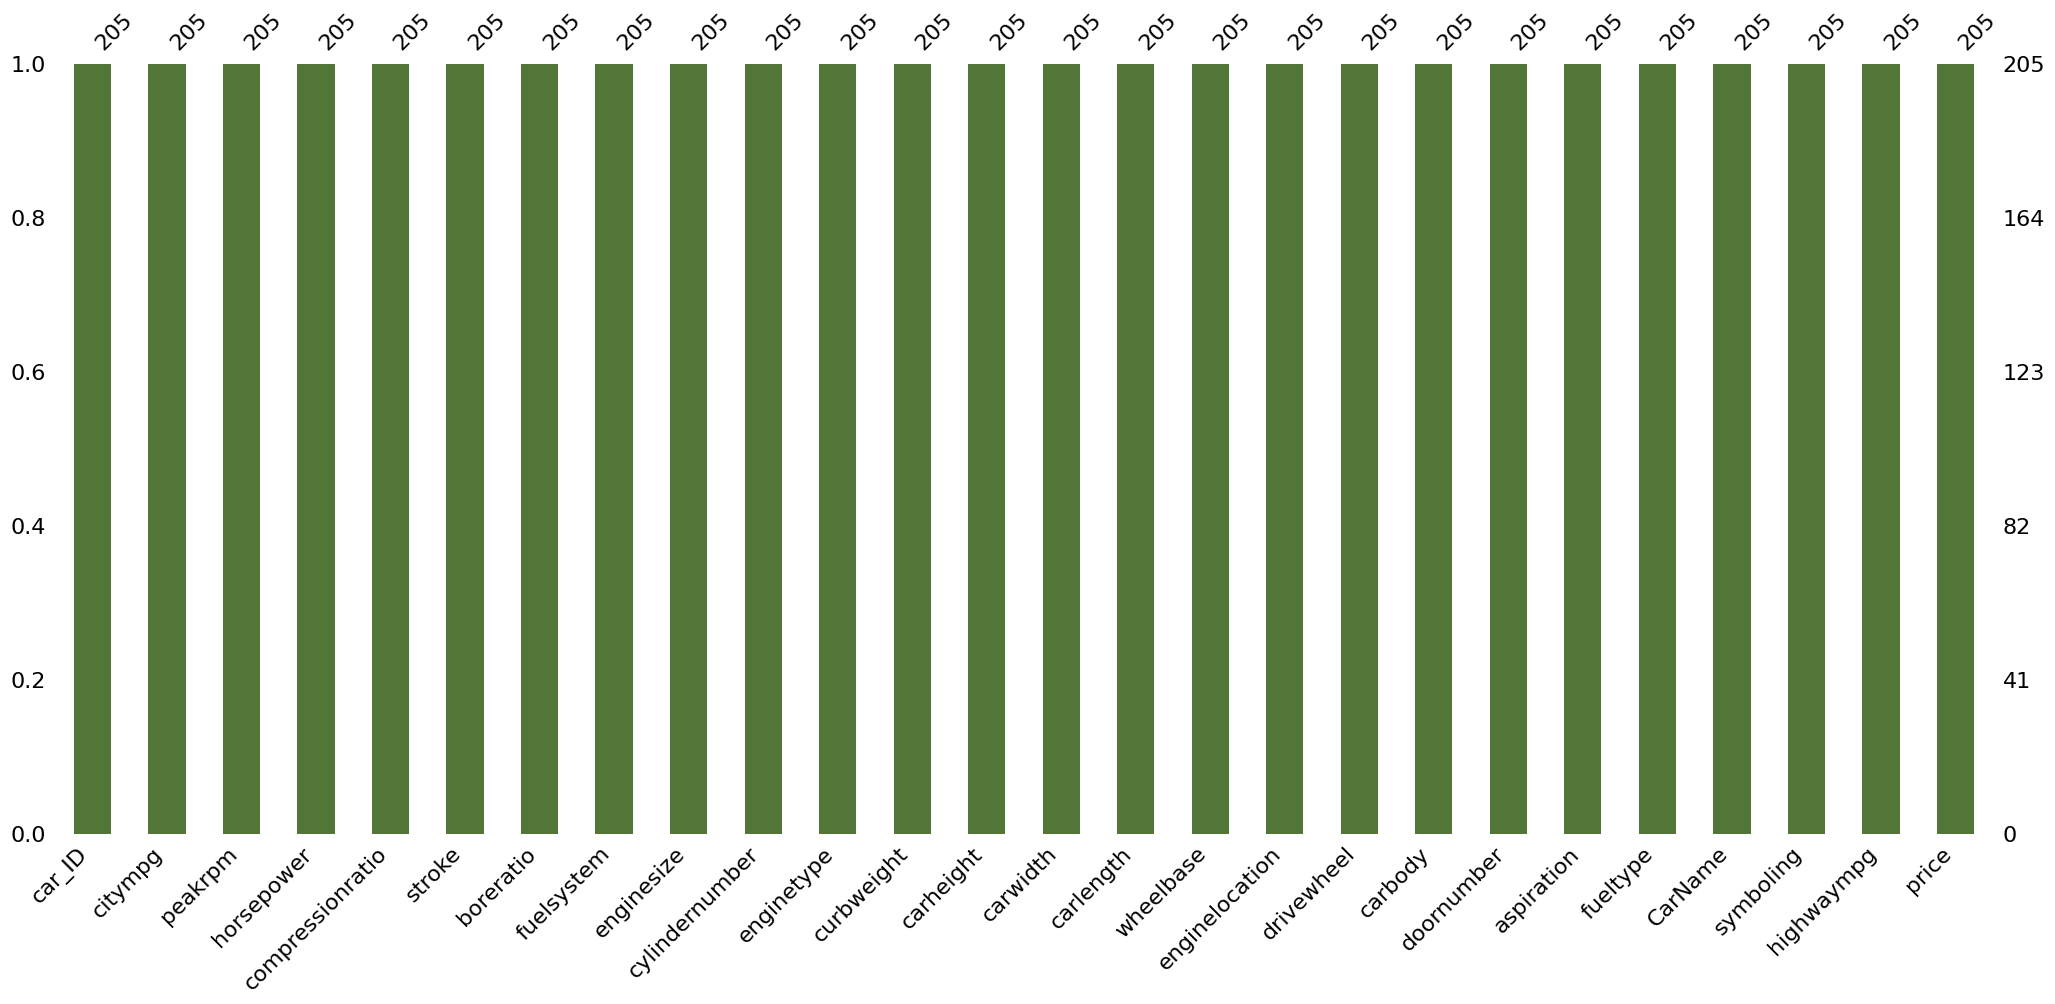

In [13]:
# Visualizacion de valores nulos por columna
msno.bar(cars, color='#527638', fontsize=16, labels=True, p=0, sort='ascending')
plt.show()

# Tipos de variable

In [15]:
column_types = cars.dtypes

#Columnas discrestas
discrete_count = sum(np.issubdtype(dtype, np.integer) for dtype in column_types)
discrete_columns = cars.columns[column_types == np.int64]
print(f"\nDiscretas: {discrete_count}, [{', '.join(discrete_columns)}]")

#Columnas continuas
continuous_count = sum(np.issubdtype(dtype, np.integer) for dtype in column_types)
continuous_columns = cars.columns[column_types == np.float64]
print(f"\nContinuas: {continuous_count}, [{', '.join(continuous_columns)}]")

#Columnas categoricas
categorical_count = sum(np.issubdtype(dtype, np.object_) for dtype in column_types)
categorical_columns = cars.columns[column_types == np.object_]
print(f"\nCategoricas: {categorical_count}, [{', '.join(categorical_columns)}]")


Discretas: 8, [car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg]

Continuas: 8, [wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio, price]

Categoricas: 10, [CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]


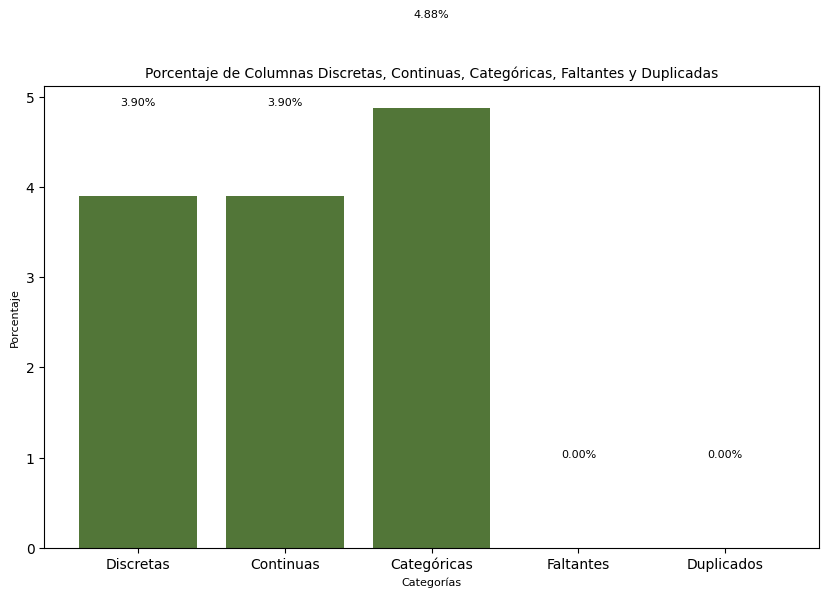

In [19]:
# Calcular porcentajes
percentage_discrete = (discrete_count / num_observations) * 100
percentage_continuous = (continuous_count / num_observations) * 100
percentage_categorical = (categorical_count / num_observations) * 100
percentage_all_missing = (all_missing_columns / num_observations) * 100
percentage_num_duplicate_rows = (num_duplicate_rows / num_observations) * 100

# Crear un gráfico de barras
categories = ['Discretas', 'Continuas','Categóricas', 'Faltantes', 'Duplicados']
percentages = [percentage_discrete, percentage_continuous, percentage_categorical, percentage_all_missing, percentage_num_duplicate_rows]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#527638'])
plt.title('Porcentaje de Columnas Discretas, Continuas, Categóricas, Faltantes y Duplicadas', fontsize=10)
plt.xlabel('Categorías', fontsize=8)
plt.ylabel('Porcentaje', fontsize=8)

# Agregar etiquetas con los porcentajes
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', fontsize=8)

plt.show()

# Normalizacion de nombres de las columnas

In [20]:
print (f"Nombres originales de las columnas: {cars.columns}/n")

def convert_to_snake_case(column_name):
    return inflection.underscore(column_name)

cars.columns = [convert_to_snake_case(col) for col in cars.columns]

#Creamos el diccionario con los titulos de las columnas que vamos a cambiar
diccionario_columnas = {
    'fueltype': 'fuel_type','doornumber': 'door_number', 'carbody': 'car_body', 'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','car_width': '',
    'carheight': 'car_height','curbweight': 'curb_weight','enginetype': 'engine_type','cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio','compressionratio': 'compression_ratio',
    'horsepower': 'horse_power','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg','carwidth':"car_width"
}

#Cambiamos los nombres de las columnas
for columna in cars.columns:
    if columna in diccionario_columnas:
        nuevo_nombre = diccionario_columnas[columna]
        cars.rename(columns={columna: nuevo_nombre}, inplace=True)

#Verificamos que los nombres se hallan cambiado 
print(f"\nNuevos nombres de las columnas : {cars.columns}")

Nombres originales de las columnas: Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')/n

Nuevos nombres de las columnas : Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


#Normalizacion en las filas

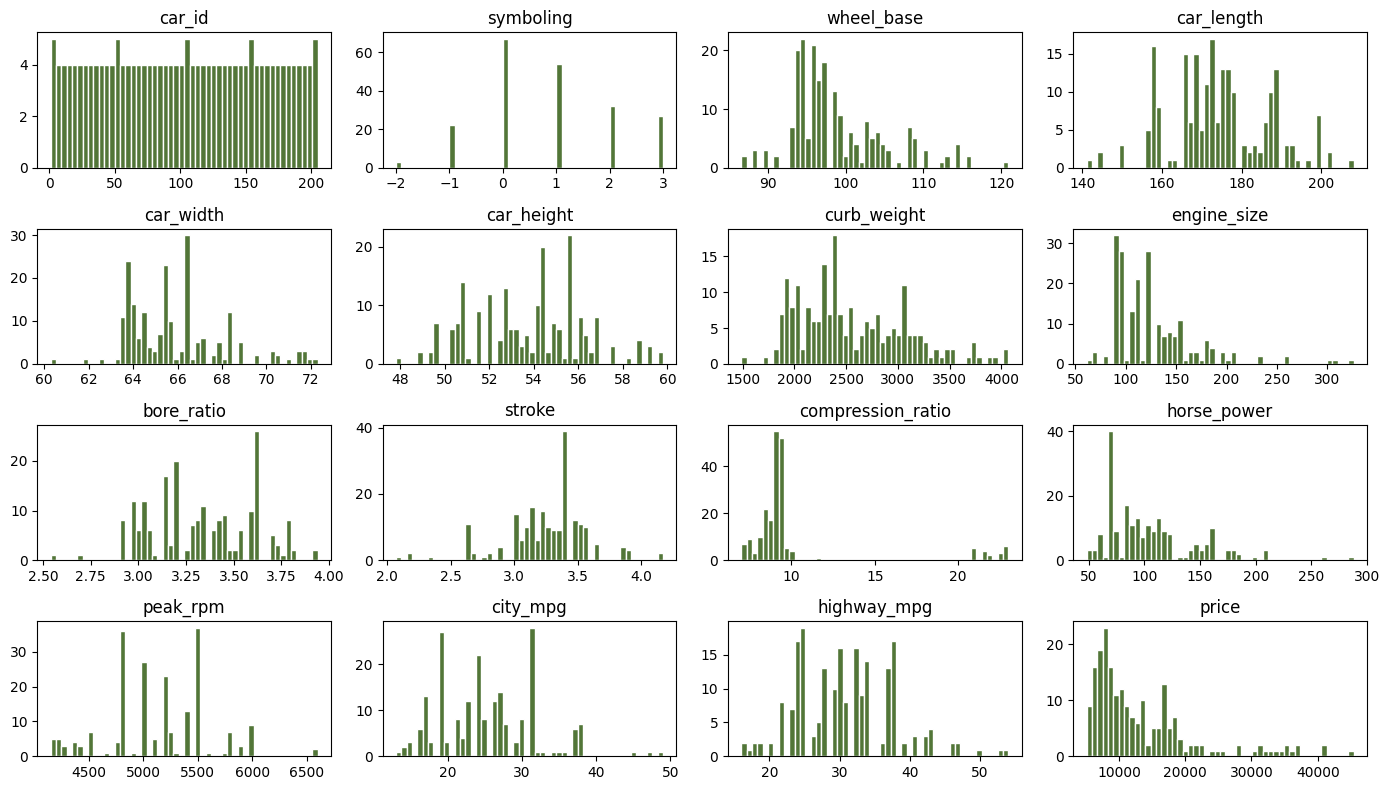

In [22]:
#Buscamos los valores atipicos (outliers) de manera visual  mediante histogramas

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Obtener el número de columnas numéricas
num_columns = len(numeric_columns.columns)

# Calcular el número de filas y columnas para los subplots
num_rows = (num_columns // 4) + (num_columns % 4)
num_cols = 4

# Crear subplots para cada columna numérica
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

# Aplanar la matriz de subplots si es necesario
axes = axes.flatten()

# Iterar sobre las columnas numéricas y crear histogramas
for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(cars[col], bins=50, color='#527638', edgecolor='white')
    axes[i].set_title(col)

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el histograma
plt.show()

In [35]:
# Separamos la columna car_id en dos columnas (marca y modelo)
cars['car_name'] = cars['car_name'].str.lower()

# Dividimos la columna 'car_name' en 'marca' y 'modelo'
split_names = cars['car_name'].str.split(' ', n=1, expand=True)

# Asignamos las nuevas columnas
cars['marca'] = split_names[0]
cars['modelo'] = split_names[1]

# Volvemos a ordenar las columnas
cars = cars[['car_id', 'car_name', 'marca', 'modelo'] + [col for col in cars.columns if col not in ['car_id', 'car_name', 'marca', 'modelo']]]

styled_cars = cars.style.set_properties(**{'text-align': 'left'}, subset=['marca', 'modelo'])
styled_cars

cars = cars.drop('car_name', axis=1)
print(cars.marca.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [36]:
#Corrección en nombres de marcas
marca_correccion = {'alfa-romero': 'alfa romeo', 
                    'maxda': 'mazda',
                    'Nissan': 'nissan',
                    'porcshce': 'porsche',
                    'toyouta': 'toyota', 
                    'vokswagen': 'volkswagen',
                    'vw': 'volkswagen'}
cars['marca'] = cars['marca'].replace(marca_correccion)
sorted_cars = cars.sort_values(by=['marca', 'modelo'], ascending=[True, True])
print((cars['marca'] + ' | ' + cars['modelo'].astype(str)).unique(), end='\n\n')

['alfa romeo | giulia' 'alfa romeo | stelvio' 'alfa romeo | quadrifoglio'
 'audi | 100 ls' 'audi | 100ls' 'audi | fox' 'audi | 5000' 'audi | 4000'
 'audi | 5000s (diesel)' 'bmw | 320i' 'bmw | x1' 'bmw | x3' 'bmw | z4'
 'bmw | x4' 'bmw | x5' 'chevrolet | impala' 'chevrolet | monte carlo'
 'chevrolet | vega 2300' 'dodge | rampage' 'dodge | challenger se'
 'dodge | d200' 'dodge | monaco (sw)' 'dodge | colt hardtop'
 'dodge | colt (sw)' 'dodge | coronet custom' 'dodge | dart custom'
 'dodge | coronet custom (sw)' 'honda | civic' 'honda | civic cvcc'
 'honda | accord cvcc' 'honda | accord lx' 'honda | civic 1500 gl'
 'honda | accord' 'honda | civic 1300' 'honda | prelude'
 'honda | civic (auto)' 'isuzu | mu-x' 'isuzu | d-max '
 'isuzu | d-max v-cross' 'jaguar | xj' 'jaguar | xf' 'jaguar | xk'
 'mazda | rx3' 'mazda | glc deluxe' 'mazda | rx2 coupe' 'mazda | rx-4'
 'mazda | 626' 'mazda | glc' 'mazda | rx-7 gs' 'mazda | glc 4'
 'mazda | glc custom l' 'mazda | glc custom' 'buick | electra 225 c

In [38]:
#limpieza de la columna modelo

def limpiar_modelo(input_string, modelo):
    # Patrón regex que coincide con la marca seguida de cualquier cosa
    patron = re.compile(rf'{modelo}.*', flags=re.IGNORECASE)
    
    # Reemplazar todas las ocurrencias que coinciden con el patrón por la marca
    return re.sub(patron, modelo, input_string)


modelos_a_limpiar = ['accord', 'civic', '100', 'corolla', 'corona', '99', 'celica', 'century', 
                     'rabbit', 'mirage', 'glc', 'fury','d-max','coronet','colt']

for modelo in modelos_a_limpiar:
    cars['modelo'] = cars['modelo'].astype(str).apply(limpiar_modelo, modelo=modelo)

In [40]:
#Corrección de los nombres de modelos
modelo_correccion = {'100': 'a6', 
                     'fox': '80',
                     'corona': 'cressida',
                     'mark ii': 'cressida',
                     'mark ii': 'cressida'}
cars['modelo'] = cars['modelo'].replace(modelo_correccion)

# Redondear la columna 'price' y convertir a enteros
cars['price'] = cars['price'].round().astype(int)

# Calcula la mediana de la columna "price"
mediana_precio = cars['price'].median()

# Crea la columna "clasificacion_precio" utilizando una condición
cars['clasificacion_precio'] = (cars['price'] <= mediana_precio).astype(int)
print(cars[['price', 'clasificacion_precio']]) #1 si el valor se encuentra debajo de la mediana y 0 si se encuentra sobre la mediana

     price  clasificacion_precio
0    13495                     0
1    16500                     0
2    16500                     0
3    13950                     0
4    17450                     0
..     ...                   ...
200  16845                     0
201  19045                     0
202  21485                     0
203  22470                     0
204  22625                     0

[205 rows x 2 columns]


In [41]:
# Diccionario de mapeo de valores
mapeo = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 20}

#columna "door_number": número de puertas
print("Columna: door_number")
print("Valores Originales:")
print(cars['door_number'].unique())

cars['door_number'] = cars['door_number'].map(mapeo)

print("\nValores Convertidos a Números:")
print(cars['door_number'])

print()
print("--------------------------------------")

#columna "cylinder_number":número de cilindros del motor
print("Columna: cylinder_number")
print("Valores Originales:")
print(cars['cylinder_number'].unique())

cars['cylinder_number'] = cars['cylinder_number'].map(mapeo)
cars['cylinder_number'] = cars['cylinder_number'].fillna(0)
cars['cylinder_number'] = cars['cylinder_number'].astype(int)

print("\nValores Convertidos a Números:")
print(cars['cylinder_number'])

print()
print("--------------------------------------")

#columna "symboling": es la  de calificación de riesgo
print("Columna: symboling")
print("Valores Originales:")
print(cars['symboling'].unique())

mapeo_calificaciones = {-3: 'Muy Seguro', -2: 'Seguro', -1: 'Poco Seguro', 0: 'Neutral', 1: 'Riesgoso', 2: 'Muy Riesgoso', 3: 'Extremadamente Riesgoso'}

# Mapea las etiquetas a la columna 'symboling'
cars['calificacion_riesgo'] = cars['symboling'].map(mapeo_calificaciones)

cars = cars.drop('symboling', axis=1)

print("\nValores Convertidos:")
print(cars['calificacion_riesgo'])

Columna: door_number
Valores Originales:
['two' 'four']

Valores Convertidos a Números:
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: door_number, Length: 205, dtype: int64

--------------------------------------
Columna: cylinder_number
Valores Originales:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Valores Convertidos a Números:
0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder_number, Length: 205, dtype: int32

--------------------------------------
Columna: symboling
Valores Originales:
[ 3  1  2  0 -1 -2]

Valores Convertidos:
0      Extremadamente Riesgoso
1      Extremadamente Riesgoso
2                     Riesgoso
3                 Muy Riesgoso
4                 Muy Riesgoso
                ...           
200                Poco Seguro
201                Poco Seguro
202                Poco Seguro
203                Poco Seguro
204                

# Tamaño total en memoria

In [42]:
total_memory_size = cars.memory_usage().sum() / 1024  # Convertir a KiB
print(f"\nTamaño total en memoria: {total_memory_size:.2f} KiB")


Tamaño total en memoria: 42.57 KiB


# Conjunto de datos limpios

El archivo 'ML_cars limpio.csv' representa el conjunto de datos después de aplicar técnicas de limpieza y preprocesamiento.

In [43]:
#Guarda el archivo 

cars.to_csv('ML_cars limpio.csv', index=False)

# CONCLUSION

El proceso de limpieza de datos que llevamos a cabo reveló una serie de hallazgos significativos que establecen una base sólida para análisis posteriores. Al examinar en detalle nuestro conjunto de datos, compuesto por 26 variables y 205 observaciones, destacamos la ausencia de filas duplicadas o valores nulos, lo que proporciona una plataforma confiable para el análisis subsiguiente.

Durante la normalización de las filas, implementamos diversas transformaciones para mejorar la coherencia y comprensión de nuestros datos. Por ejemplo, redondeamos y convertimos la columna 'price' a enteros para una representación más clara, y estandarizamos los nombres de los automóviles a snake_case en la columna 'car_name', lo que contribuye a una nomenclatura uniforme y ordenada.

Además, llevamos a cabo ajustes específicos en las columnas 'door_number', 'cylinder_number' y 'symboling' para optimizar su representación. Destaca especialmente la creación de la variable 'calificacion_riesgo', derivada del mapeo de la columna 'symboling', la cual asigna categorías de riesgo a los vehículos, ofreciendo una nueva dimensión de análisis.

Otro aspecto relevante fue la introducción de 'clasificacion_precio', basada en la mediana de 'price', que nos permite categorizar los vehículos como baratos o caros. Estas nuevas variables enriquecen nuestro conjunto de datos y amplían las perspectivas para futuros análisis.

La identificación y manejo de outliers se realizó de manera cuidadosa, considerando la distribución de las variables y la naturaleza del negocio. Aunque encontramos outliers, decidimos conservarlos debido a su relevancia y autenticidad en el contexto del negocio automotriz.

Además, adoptamos una estrategia consciente al no eliminar outliers ni columnas, lo que preserva la integridad del conjunto de datos y su capacidad para análisis de machine learning. El conjunto de datos resultante, ahora con 28 variables, se exportó como 'cleaned_dataset', listo para análisis y modelado subsiguientes.

En conclusión, este proceso exhaustivo de limpieza de datos no solo asegura la integridad y calidad de nuestros datos, sino que también sienta una base sólida para análisis avanzados y toma de decisiones informadas en el futuro.